<a href="https://colab.research.google.com/github/Amitarajak/pneumonia/blob/main/pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
import opendatasets as od
import pandas

In [ ]:
od.download("https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: amitarajak
Your Kaggle Key: ··········


100%|██████████| 2.29G/2.29G [00:57<00:00, 42.8MB/s]


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import warnings
from tqdm import tqdm
from skimage.transform import resize
from skimage.io import imread
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
# Ignore all warnings
warnings.filterwarnings("ignore")


In [ ]:

import os
from skimage.io import imread
from skimage.transform import resize
import numpy as np

def load_data(dir):
    Categories = ['NORMAL', 'PNEUMONIA']
    X_arr = []  # input array
    Y_arr = []  # output array
    for i in Categories:
        dem = 0
        print(f'loading... category : {i}')
        path = os.path.join(dir, i)
        for img in os.listdir(path):
            if img.endswith(".DS_Store"):
                continue  # Skip .DS_Store files (Mac specific)
            img_array = imread(os.path.join(path, img))
            img_resized = resize(img_array, (100, 100, 3))
            X_arr.append(img_resized.flatten() / 255)
            Y_arr.append(Categories.index(i))
            dem += 1
            if dem == 1341:  # Adjust this condition according to your needs
                break
        print(f'loaded category: {i} successfully')
    print("Completed!")
    return np.array(X_arr), np.array(Y_arr)

# Directory paths for training, testing, and validation datasets
train_dir = "/content/chest-xray-pneumonia/chest_xray/train"
test_dir = "/content/chest-xray-pneumonia/chest_xray/test"
val_dir = "/content/chest-xray-pneumonia/chest_xray/val"

# Load data for each directory
X_train, Y_train = load_data(train_dir)
X_test, Y_test = load_data(test_dir)
X_val, Y_val = load_data(val_dir)


loading... category : NORMAL
loaded category: NORMAL successfully
loading... category : PNEUMONIA
loaded category: PNEUMONIA successfully
Completed!
loading... category : NORMAL
loaded category: NORMAL successfully
loading... category : PNEUMONIA
loaded category: PNEUMONIA successfully
Completed!
loading... category : NORMAL
loaded category: NORMAL successfully
loading... category : PNEUMONIA
loaded category: PNEUMONIA successfully
Completed!


In [ ]:
def calculate_accuracy(clf,X_test, y_test):
    y_test_pred = clf.predict(X_test)

    # accuracy calculation
    test_accuracy = accuracy_score(y_test, y_test_pred)

    return test_accuracy

In [ ]:
LGR = LogisticRegression(solver='liblinear',C=1)
LGR.fit(X_train,Y_train)


LogisticRegression(C=2, solver='liblinear')

In [ ]:
accuracy = calculate_accuracy(LGR,X_test, Y_test)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.8365384615384616


In [ ]:
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Calculating accuracy
accuracy = calculate_accuracy(DT,X_test, Y_test)
print("Decision Tree Accuracy:", accuracy)

Decision Tree Accuracy: 0.7355769230769231


In [ ]:
# Random Forest Classifier
RF = RandomForestClassifier(n_estimators=8, random_state=42)
RF.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=8, random_state=42)

In [ ]:
# Calculating accuracy
accuracy = calculate_accuracy(RF,X_test, Y_test)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.8397435897435898


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing




import os
for dirname, _, filenames in os.walk('/content/chest-xray-pneumonia/chest_xray/chest_xray'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Streaming output truncated to the last 5000 lines.
/content/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person721_bacteria_2623.jpeg
/content/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person593_virus_1142.jpeg
/content/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person547_virus_1086.jpeg
/content/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person835_virus_1472.jpeg
/content/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person3_bacteria_12.jpeg
/content/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person931_virus_1592.jpeg
/content/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person775_bacteria_2679.jpeg
/content/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person494_virus_1000.jpeg
/content/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person115_virus_219.jpeg
/content/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person955_bacteria_2880.jpeg
/c

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

os.listdir("/content/chest-xray-pneumonia/chest_xray/chest_xray")

['val', '.DS_Store', 'test', 'train']

In [ ]:
len(os.listdir("/content/chest-xray-pneumonia/chest_xray/train/PNEUMONIA"))

3875

Train set:
PNEUMONIA=3875
NORMAL=1341
Test set:
PNEUMONIA=390
NORMAL=234
Validation set:
PNEUMONIA=8
NORMAL=8


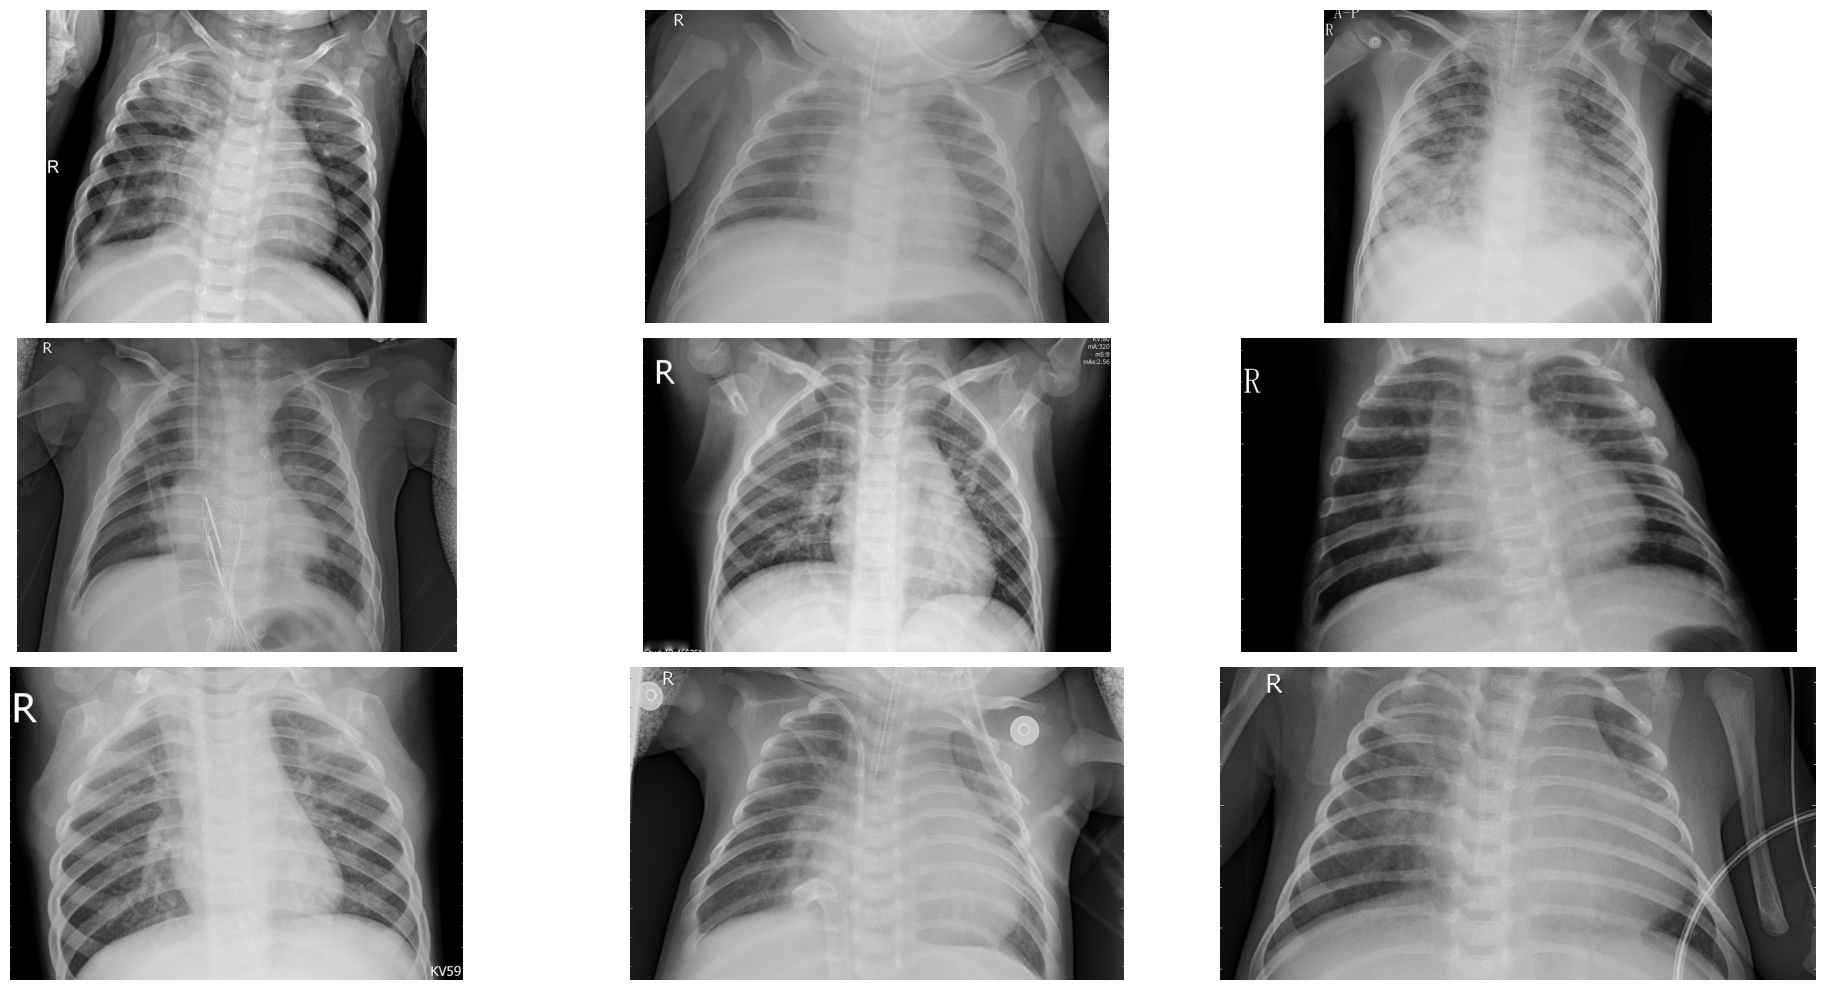

In [ ]:
train_dir = "/content/chest-xray-pneumonia/chest_xray/train"
test_dir = "/content/chest-xray-pneumonia/chest_xray/test"
val_dir = "/content/chest-xray-pneumonia/chest_xray/val"

print("Train set:\n========================================")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("Test set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

print("Validation set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")
pneumonia = os.listdir("/content/chest-xray-pneumonia/chest_xray/train/PNEUMONIA")
pneumonia_dir = "../content/chest-xray-pneumonia/chest_xray/train/PNEUMONIA"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()

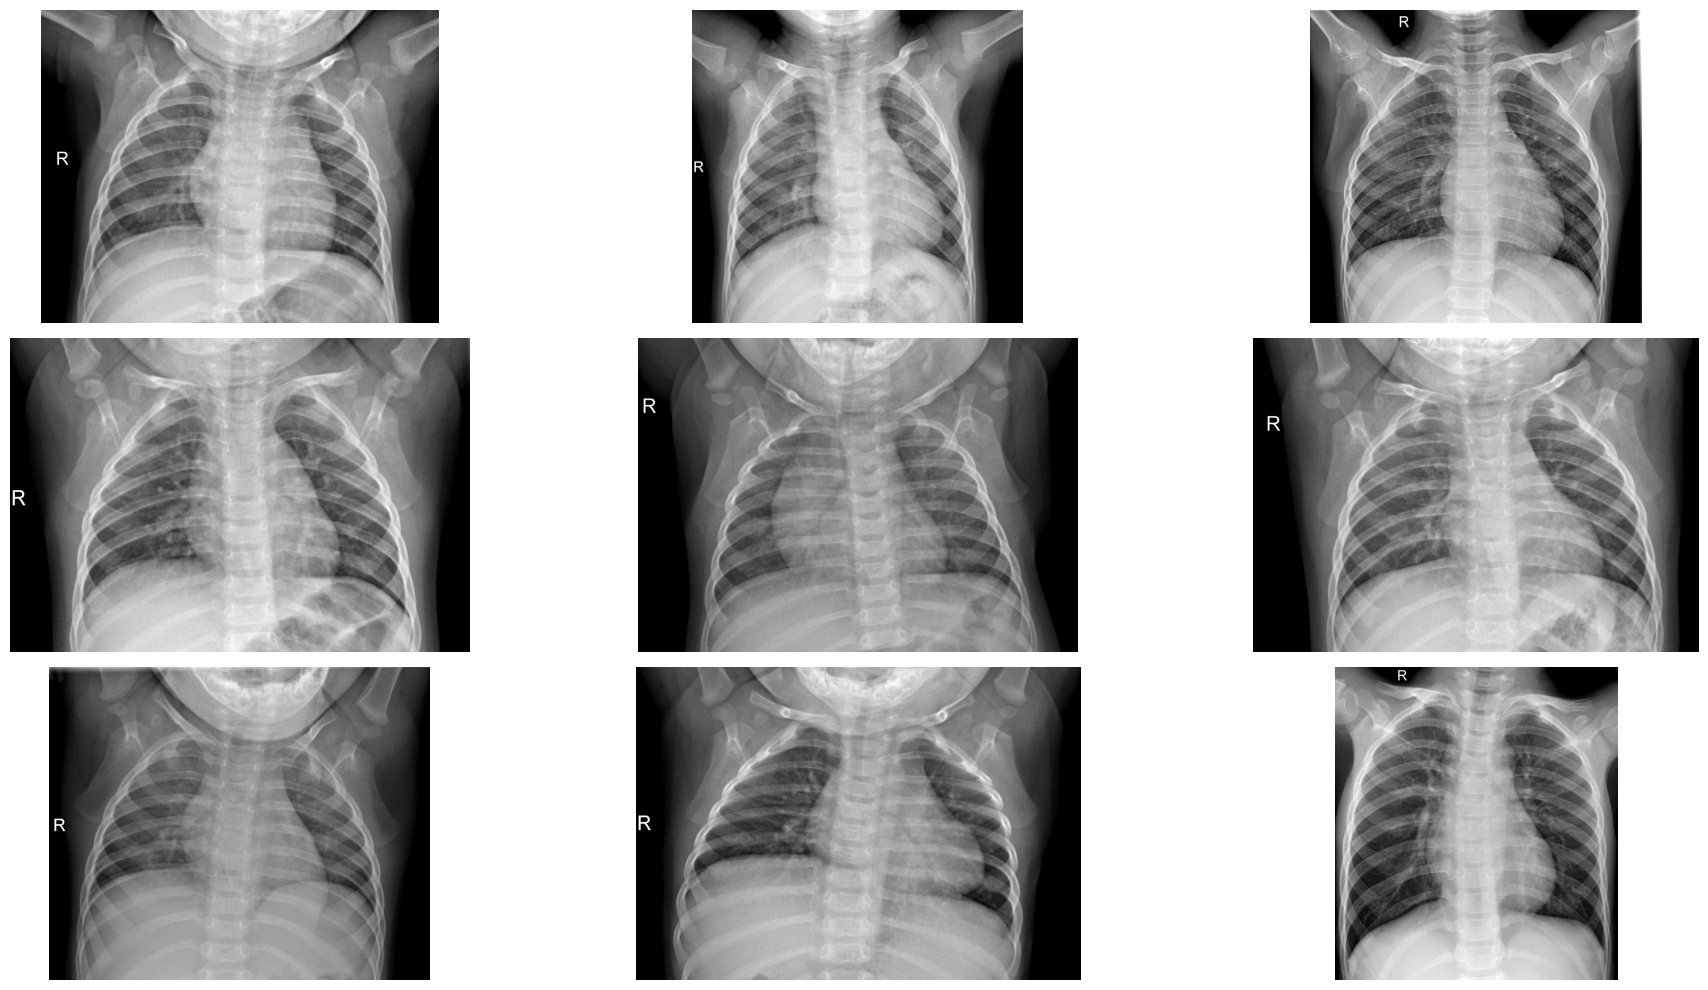

In [ ]:
normal = os.listdir("/content/chest-xray-pneumonia/chest_xray/train/NORMAL")
normal_dir = "/content/chest-xray-pneumonia/chest_xray/train/NORMAL"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()


The dimensions of the image are 1078 pixels width and 1368 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 126.6008 and the standard deviation is 64.5757


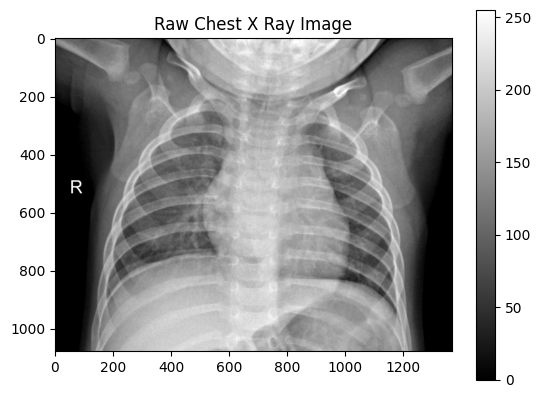

In [ ]:
normal_img = os.listdir("/content/chest-xray-pneumonia/chest_xray/train/NORMAL")[0]
normal_dir = "/content/chest-xray-pneumonia/chest_xray/train/NORMAL"
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

Text(0, 0.5, '# Pixels in Image')

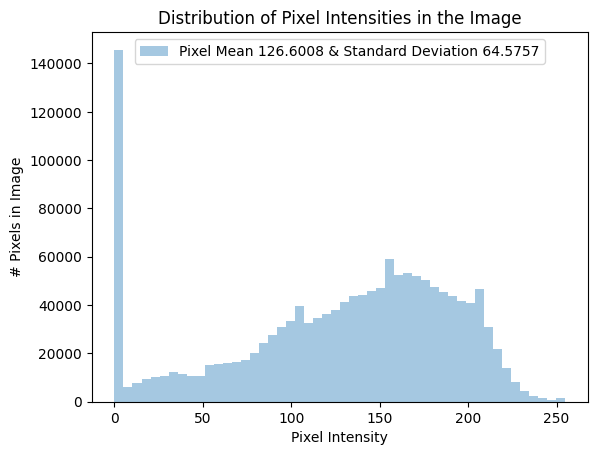

In [ ]:
sns.distplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(

    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [ ]:
train = image_generator.flow_from_directory(train_dir,
                                            batch_size=8,
                                            shuffle=True,
                                            class_mode='binary',
                                            target_size=(180, 180))

validation = image_generator.flow_from_directory(val_dir,
                                                batch_size=1,
                                                shuffle=False,
                                                class_mode='binary',
                                                target_size=(180, 180))

test = image_generator.flow_from_directory(test_dir,
                                            batch_size=1,
                                            shuffle=False,
                                            class_mode='binary',
                                            target_size=(180, 180))


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


The dimensions of the image are 180 pixels width and 180 pixels height, one single color channel.
The maximum pixel value is 2.3822 and the minimum is -2.9628
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


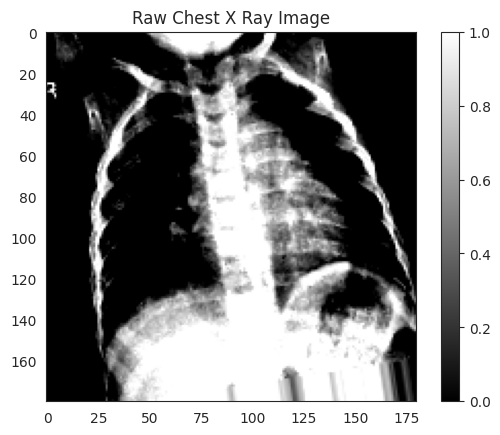

In [ ]:
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# Initializing the model
models = Sequential()

# Flattening the input image
models.add(Flatten(input_shape=(180, 180, 3)))

# Adding dense layers with dropout for regularization
models.add(Dense(256, activation='relu'))
#models.add(Dropout(0.5))
models.add(Dense(128, activation='relu'))
#models.add(Dropout(0.5))

# Output layer with sigmoid activation for binary classification
models.add(Dense(1, activation='sigmoid'))


In [ ]:
models.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 97200)             0         
                                                                 
 dense (Dense)               (None, 256)               24883456  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 24916481 (95.05 MB)
Trainable params: 24916481 (95.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


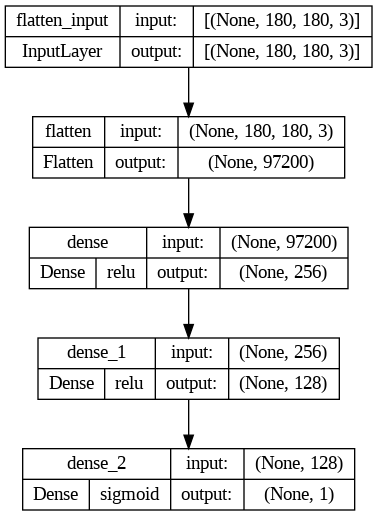

In [ ]:
keras.utils.plot_model(models, show_layer_activations=True, show_shapes=True)

In [ ]:
models.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = models.fit(train, epochs=10, batch_size=32, validation_data=validation)

Epoch 1/10
652/652 [==============================] - 86s 126ms/step - loss: 2.5086 - accuracy: 0.8089 - val_loss: 1.1846 - val_accuracy: 0.6250
Epoch 2/10
652/652 [==============================] - 83s 128ms/step - loss: 0.6571 - accuracy: 0.8403 - val_loss: 3.7346 - val_accuracy: 0.5625
Epoch 3/10
652/652 [==============================] - 83s 127ms/step - loss: 0.8073 - accuracy: 0.8368 - val_loss: 1.7800 - val_accuracy: 0.8125
Epoch 4/10
652/652 [==============================] - 82s 126ms/step - loss: 0.4586 - accuracy: 0.8600 - val_loss: 1.0023 - val_accuracy: 0.8125
Epoch 5/10
652/652 [==============================] - 83s 127ms/step - loss: 0.3444 - accuracy: 0.8756 - val_loss: 1.1290 - val_accuracy: 0.6250
Epoch 6/10
652/652 [==============================] - 82s 126ms/step - loss: 0.3187 - accuracy: 0.8737 - val_loss: 0.9953 - val_accuracy: 0.6875
Epoch 7/10
652/652 [==============================] - 82s 126ms/step - loss: 0.3421 - accuracy: 0.8836 - val_loss: 1.1923 - val_ac

In [ ]:
test_loss, test_accuracy = models.evaluate(test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

624/624 [==============================] - 13s 20ms/step - loss: 0.6047 - accuracy: 0.8093
Test Loss: 0.6046935319900513
Test Accuracy: 0.8092948794364929


Text(0.5, 1.0, 'Accuracy Evolution')

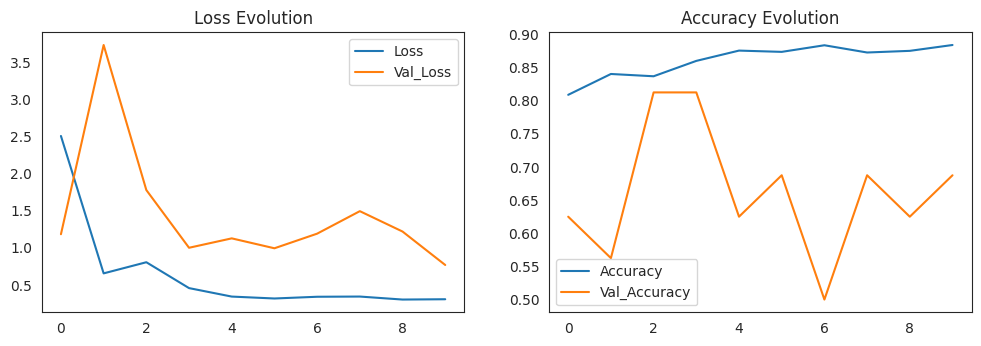

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = models.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

624/624 [==============================] - 10s 16ms/step
[[144  90]
 [ 31 359]]


,0,1,accuracy,macro avg,weighted avg
precision,0.822857,0.799555,0.80609,0.811206,0.808293
recall,0.615385,0.920513,0.80609,0.767949,0.806090
f1-score,0.704156,0.855781,0.80609,0.779969,0.798922
support,234.000000,390.000000,0.80609,624.000000,624.000000


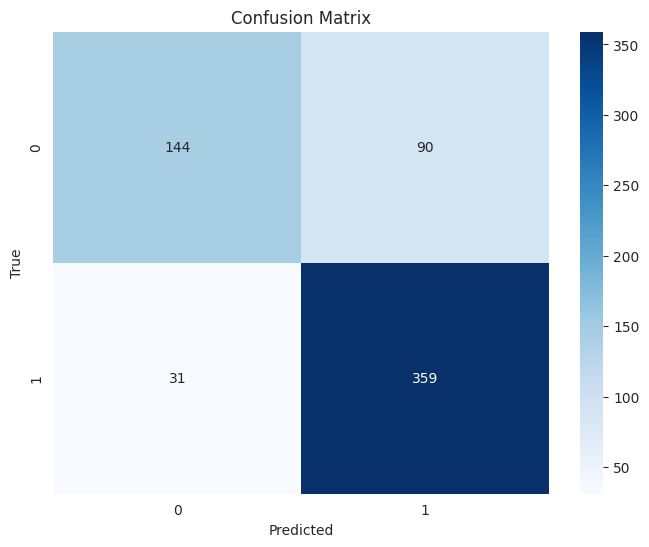

In [ ]:
pred_classes = (pred > 0.5).astype(int)

# Computing confusion matrix
cm = confusion_matrix(test.classes, pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from keras import layers, models

inputs = layers.Input(shape=(180, 180, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)

outputs = layers.Dense(units=1, activation="sigmoid")(x)

modeld = models.Model(inputs=inputs, outputs=outputs)







In [ ]:
modeld.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856 

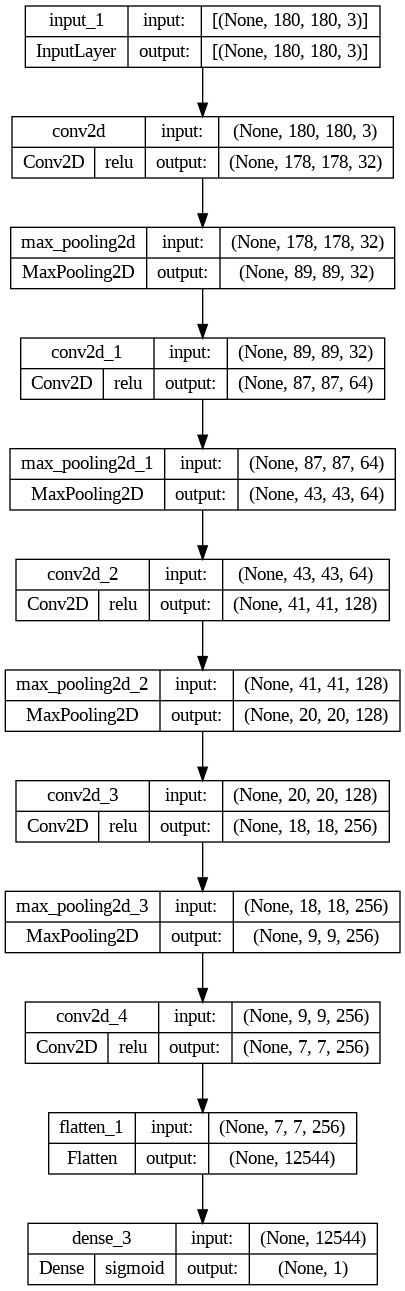

In [ ]:
keras.utils.plot_model(modeld, show_layer_activations=True, show_shapes=True)

In [ ]:
modeld.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


In [ ]:
modeld.fit(train, epochs=10, batch_size=32, validation_data=validation, verbose=1)

Epoch 1/10
652/652 [==============================] - 83s 128ms/step - loss: 0.1340 - accuracy: 0.9540 - val_loss: 1.4695 - val_accuracy: 0.6250
Epoch 2/10
652/652 [==============================] - 83s 127ms/step - loss: 0.1260 - accuracy: 0.9542 - val_loss: 0.7951 - val_accuracy: 0.6875
Epoch 3/10
652/652 [==============================] - 84s 128ms/step - loss: 0.1237 - accuracy: 0.9603 - val_loss: 1.0486 - val_accuracy: 0.6875
Epoch 4/10
652/652 [==============================] - 83s 128ms/step - loss: 0.1234 - accuracy: 0.9597 - val_loss: 1.0885 - val_accuracy: 0.6875
Epoch 5/10
652/652 [==============================] - 84s 128ms/step - loss: 0.1272 - accuracy: 0.9640 - val_loss: 0.5257 - val_accuracy: 0.8125
Epoch 6/10
652/652 [==============================] - 84s 129ms/step - loss: 0.1279 - accuracy: 0.9586 - val_loss: 1.9352 - val_accuracy: 0.6250
Epoch 7/10
652/652 [==============================] - 88s 134ms/step - loss: 0.1146 - accuracy: 0.9661 - val_loss: 0.9899 - val_ac

In [ ]:
evaluation = modeld.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = modeld.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 11s 17ms/step - loss: 0.6368 - accuracy: 0.8253
Test Accuracy: 82.53%
652/652 [==============================] - 84s 129ms/step - loss: 0.0696 - accuracy: 0.9766
Train Accuracy: 97.66%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = modeld.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

624/624 [==============================] - 11s 17ms/step
[[117 117]
 [  2 388]]


,0,1,accuracy,macro avg,weighted avg
precision,0.983193,0.768317,0.809295,0.875755,0.848895
recall,0.500000,0.994872,0.809295,0.747436,0.809295
f1-score,0.662890,0.867039,0.809295,0.764964,0.790483
support,234.000000,390.000000,0.809295,624.000000,624.000000


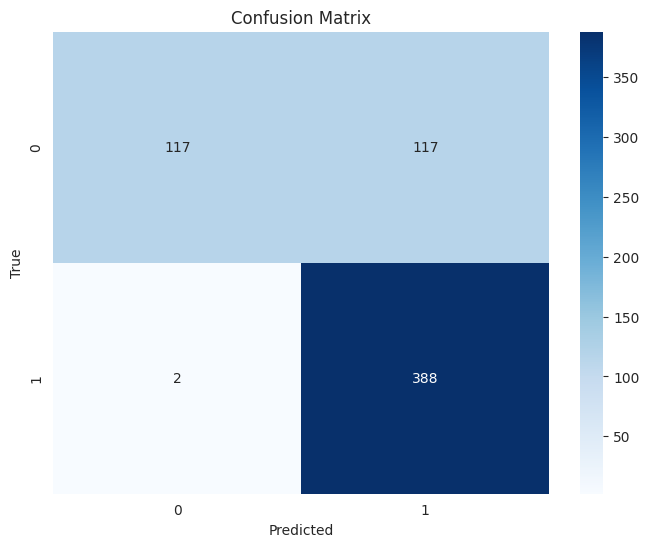

In [ ]:

# Converting probabilities to predicted classes based on a threshold
pred_classes = (pred > 0.5).astype(int)

# Computing confusion matrix
cm = confusion_matrix(test.classes, pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.74
Weight for class 1: 0.26


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 178, 178, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 176, 176, 32)      128       
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 176, 176, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 88, 88, 32)        0

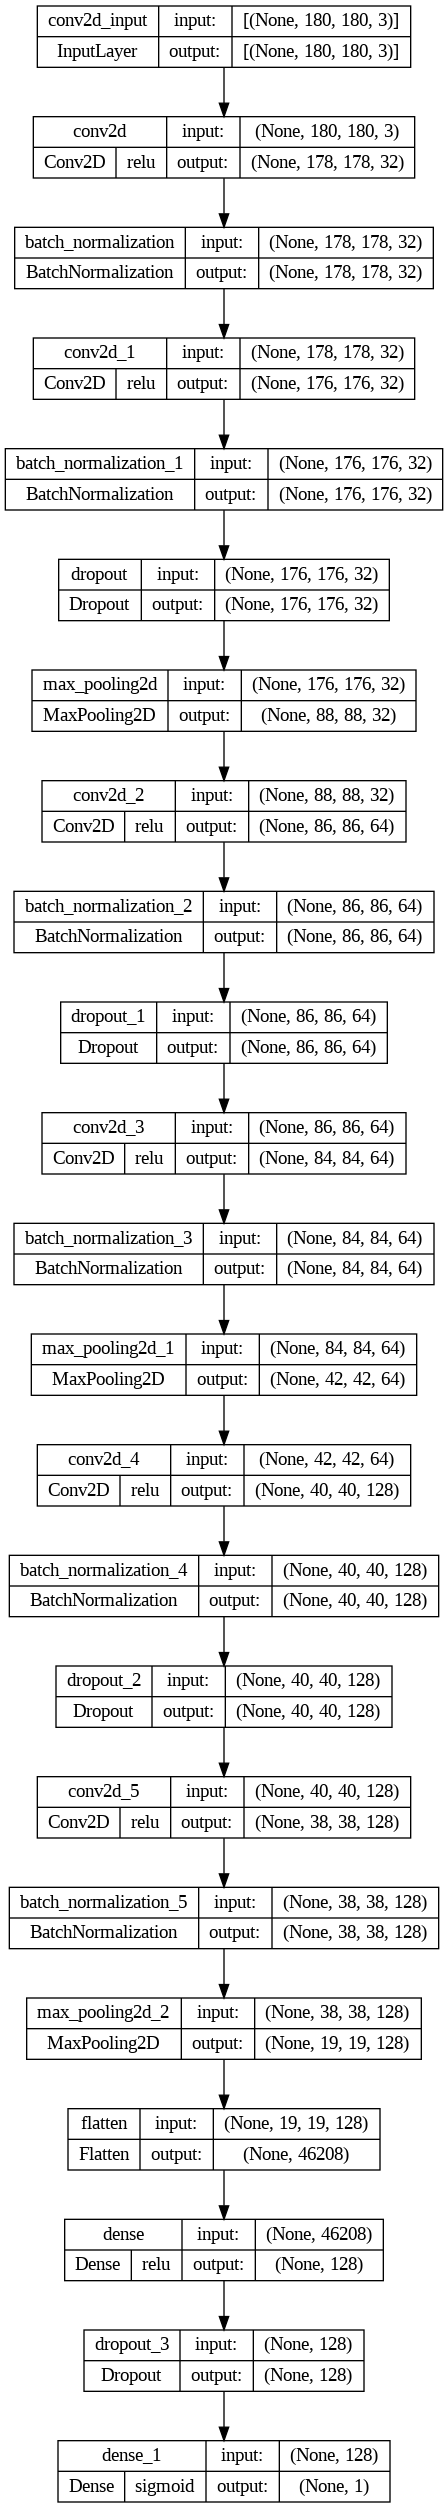

In [ ]:
keras.utils.plot_model(model, show_layer_activations=True, show_shapes=True)

In [ ]:
import warnings

# Suppressing the warning about running out of data
warnings.filterwarnings("ignore", category=UserWarning)

r = model.fit(
    train,
    epochs=10,
    batch_size=25,
    validation_data=validation,
    class_weight=class_weight,
    verbose=1

)

Epoch 1/10
652/652 [==============================] - 1390s 2s/step - loss: 0.2959 - accuracy: 0.8451 - val_loss: 4.7598 - val_accuracy: 0.6250
Epoch 2/10
652/652 [==============================] - 1352s 2s/step - loss: 0.0895 - accuracy: 0.9170 - val_loss: 3.1215 - val_accuracy: 0.5000
Epoch 3/10
652/652 [==============================] - 1346s 2s/step - loss: 0.0912 - accuracy: 0.9135 - val_loss: 1.5952 - val_accuracy: 0.6250
Epoch 4/10
652/652 [==============================] - 1351s 2s/step - loss: 0.0968 - accuracy: 0.9170 - val_loss: 1.1771 - val_accuracy: 0.5625
Epoch 5/10
652/652 [==============================] - 1329s 2s/step - loss: 0.0778 - accuracy: 0.9262 - val_loss: 0.9719 - val_accuracy: 0.6250
Epoch 6/10
652/652 [==============================] - 1344s 2s/step - loss: 0.0957 - accuracy: 0.9254 - val_loss: 1.4488 - val_accuracy: 0.5000
Epoch 7/10
652/652 [==============================] - 1334s 2s/step - loss: 0.1332 - accuracy: 0.9185 - val_loss: 1.4753 - val_accuracy:

Text(0.5, 1.0, 'Accuracy Evolution')

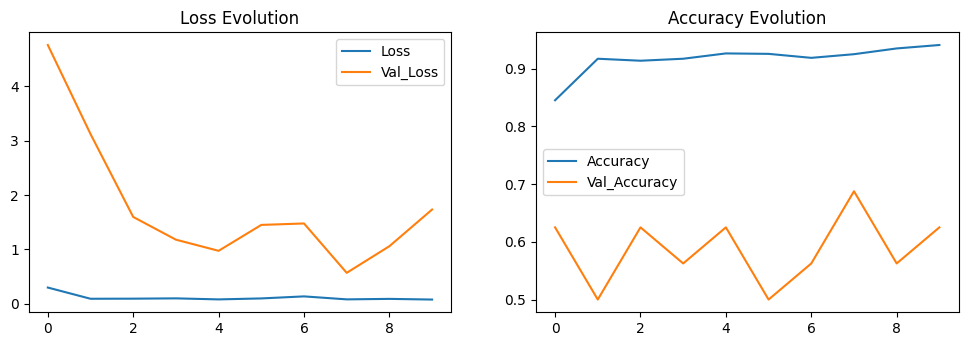

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 48s 76ms/step - loss: 0.6005 - accuracy: 0.7901
Test Accuracy: 79.01%
652/652 [==============================] - 352s 540ms/step - loss: 0.1634 - accuracy: 0.9394
Train Accuracy: 93.94%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

In [ ]:
print(confusion_matrix(test.classes, pred > 0.7))
pd.DataFrame(classification_report(test.classes, pred > 0.7, output_dict=True))

In [ ]:

# Assuming 'test.classes' contains the true class labels and 'pred' contains the predicted probabilities

# Converting probabilities to predicted classes based on a threshold
pred_classes = (pred > 0.7).astype(int)

# Computing confusion matrix
cm = confusion_matrix(test.classes, pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Defining early stopping callback
early_stopping_monitor = EarlyStopping(patience=3, monitor="val_acc", mode="max", verbose=2)

# Defining model checkpoint callback
checkpoint_path = "model1_checkpoints/cp.ckpt"
model1_checkpoint = ModelCheckpoint(checkpoint_path, monitor="val_acc", save_best_only=True, save_weights_only=True, mode="max", verbose=2)

# List of callbacks
callbacks_list = [early_stopping_monitor, model1_checkpoint]


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
f = model.fit(
    train,
    epochs=10,
    validation_data=validation,
    class_weight=class_weight,
    verbose,

    callbacks=callbacks_list
)

In [ ]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")